In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)
print(p.shape[0])

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]
4


Solution
===

In [3]:
def naive(p, q):
    ''' 
        naive
        Returns the euclidean distances between points in two arrays
        Uses a naive (and slow!) for loop method
        
        INPUTS
        p: An m by 2 array representing 2 dimensional points in R^m
        q: An m by 2 array representing 2 dimensional points in R^m
        
        OUTPUTS
        d: A p by q array representing the euclidean distances between two points in p and q
    '''
    d = np.zeros(p.shape[0]*q.shape[0])
    i = 0
    for point_p in p:
        for point_q in q:
            d[i] = np.sqrt((point_p[0]-point_q[0])**2+(point_p[1]-point_q[1])**2)
            i = i+1
    d.reshape([p.shape[0],q.shape[0]])
    return d
 
            

In [11]:
def improved_naive(p, q):
    ''' 
        naive
        Returns the euclidean distances between points in two arrays
        Uses a naive (and slow!) for loop method
        
        INPUTS
        p: An m by 2 array representing 2 dimensional points in R^m
        q: An m by 2 array representing 2 dimensional points in R^m
        
        OUTPUTS
        d: A p by q array representing the euclidean distances between two points in p and q
    '''
    d = np.zeros(p.shape[0]*q.shape[0])
    i = 0
    for point_p in p:
        for point_q in q:
            d[i] = np.sqrt(np.sum((point_p-point_q)**2))
            i = i+1
    return d

In [12]:
improved_naive(p,q)

array([0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751,
       0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491,
       0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825,
       0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [13]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [4]:
rows.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [91]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])
print(p[rows.ravel(),0])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [14]:
def with_indices(p, q):
    ''' 
        naive
        Returns the euclidean distances between points in two arrays
        Uses a faster method using array indexing
        
        INPUTS
        p: An m by 2 array representing 2 dimensional points in R^m
        q: An m by 2 array representing 2 dimensional points in R^m
        
        OUTPUTS
        d: A p by q array representing the euclidean distances between two points in p and q
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0])) # get a row-col representation of p and q
    d = np.sqrt((p[rows.ravel(),0]-q[cols.ravel(),0])**2+(p[rows.ravel(),1]-q[cols.ravel(),1])**2) # compute the distances
    d.reshape([p.shape[0],q.shape[0]]) # reshape d into a p by a matrix
    return d

In [104]:
with_indices(p,q)

array([0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751,
       0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491,
       0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825,
       0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [15]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [16]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [18]:
methods = [naive, improved_naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

105 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
192 ms ± 8.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
412 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.55 ms ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.8 ms ± 856 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


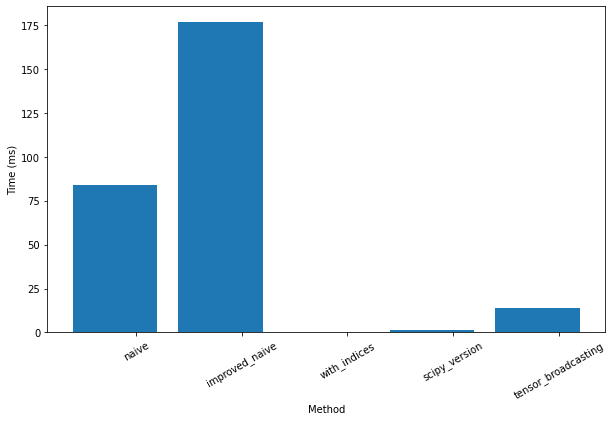

In [19]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()